<a href="https://colab.research.google.com/github/Rounak-Das-02/Walmart-Price-Prediction/blob/master/Walmart%20Price%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
!git clone https://github.com/Rounak-Das-02/Walmart-Price-Prediction.git

fatal: destination path 'Walmart-Price-Prediction' already exists and is not an empty directory.


In [0]:
train = pd.read_csv("/content/Walmart-Price-Prediction/data/train.csv")

In [0]:
train.isnull().sum()

In [0]:
train["year"] = pd.to_datetime(train["Date"]).dt.year
train["month"] = pd.to_datetime(train["Date"]).dt.month
train["day"] = pd.to_datetime(train["Date"]).dt.day

In [0]:
real_dates = np.array(train["Date"])
train = train.drop("Date" ,axis = 1)

In [0]:
target = train.Weekly_Sales
target

In [0]:
train = train.drop("Weekly_Sales" , axis = 1)

In [0]:
train .head()

In [0]:
x_train , x_test , y_train , y_test = train_test_split(train , target , test_size = 0.2)

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib
joblib.dump(x_train , "to be fit_transformed into the Standard Scaler")

In [0]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [14]:
rfr = RandomForestRegressor()
rfr.fit(x_train , y_train)
y_pred = rfr.predict(x_test)
print(r2_score(y_test , y_pred))

0.965875868417727


In [0]:
from sklearn.externals import joblib

In [17]:
joblib.dump(rfr , "model.pkl")

['model.pkl']

In [0]:
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler

model = joblib.load("/content/model.pkl")
x_train = joblib.load("/content/to be fit_transformed into the Standard Scaler")


test = pd.read_csv("/content/Walmart-Price-Prediction/data/test.csv")



test["year"] = pd.to_datetime(test["Date"]).dt.year
test["month"] = pd.to_datetime(test["Date"]).dt.month
test["day"] = pd.to_datetime(test["Date"]).dt.day

dates = np.array(test["Date"])

test = test.drop("Date" ,axis =1)

sc = StandardScaler()
ty = sc.fit_transform(x_train)
test = sc.transform(test)

output = model.predict(test)

In [10]:
test = pd.read_csv("/content/Walmart-Price-Prediction/data/test.csv")
test["Predicted Weekly_Sales"] = output
test.head()

,Store,Dept,Date,IsHoliday,Predicted Weekly_Sales
0,1,1,2012-11-02,False,37596.9890
1,1,1,2012-11-09,False,20184.3721
2,1,1,2012-11-16,False,20465.4022
3,1,1,2012-11-23,True,20590.0148
4,1,1,2012-11-30,False,31499.6612


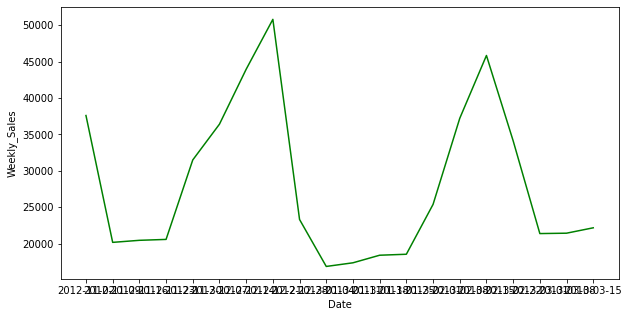

In [19]:
plt.figure(0,figsize = [10,5])
plt.plot(dates[:20] , output[:20] , color = "green")
plt.xlabel("Date" , size = 10)
plt.ylabel("Weekly_Sales" , size = 10)
plt.show()